In [79]:
%%javascript
require(['base/js/utils'],
function(utils) {
   utils.load_extensions('calico-spell-check');
});

<IPython.core.display.Javascript object>

# CS-109: Fall 2015  -- Lab 11


# Project Guidelines:
Much of this is taken directly from the [Project Page](http://cs109.github.io/2015/pages/projects.html) on the CS109 website.

> Goal: to go through the complete data science process to answer questions you have about some topic.
>
> How?
> - acquire the data
> - design your visualizations
> - run statistical analysis
> - communicate the results

### Project Milestones:
- **Proposal**: Due 11/12/2015
- **Proposal Review**: You'll be assigned a TF as an advisor, they'll review your proposal and meet with your **entire** team.


### Data science as a process
You'll start with an initial idea, your TF should be able to guide you as to the viability of such a proposal. However, as with any project, you'll run into roadblocks! It's important for us to see the entire process and not just the final product. **Your proposal is a great jumping-off point for some of this!**

>#### IPython Process Book

>An important part of your project is your iPython process book. Your process book details your steps in developing your solution, including how you collected the data, alternative solutions you tried, describing statistical methods you used, and the insights you got. Equally important to your final results is how you got there! Your process book is the place you describe and document the space of possibilities you explored at each step of your project. We strongly advise you to include many visualizations in your process book.Your process book should include the following topics. Depending on your project type the amount of discussion you devote to each of them will vary:

> - **Overview and Motivation**: Provide an overview of the project goals and the motivation for it. Consider that this will be read by people who did not see your project proposal.

> - **Related Work**: Anything that inspired you, such as a paper, a web site, or something we discussed in class.

> - **Initial Questions**: What questions are you trying to answer? How did these questions evolve over the course of the project? What new questions did you consider in the course of your analysis? - Data: Source, scraping method, cleanup, storage, etc.

> - **Exploratory Data Analysis**: What visualizations did you use to look at your data in different ways? What are the different statistical methods you considered? Justify the decisions you made, and show any major changes to your ideas. How did you reach these conclusions?

> - **Final Analysis**: What did you learn about the data? How did you answer the questions? How can you justify your answers?

> - **Presentation**: Present your final results in a compelling and engaging way using text, visualizations, images, and videos on your project web site.

>Describe the storytelling elements and goals in your process notebook and show us sketches and screenshots of different web site iterations. As this will be your only chance to describe your project in detail make sure that your process book is a standalone document that fully describes your process and results.

### Final Products
- **Code**: you've been graded all semester on this, just keep doing a great job at submitting clean code with comments
- **Website**: make a *public website* (Github pages, Google sites, etc.), summarize the main results of your project and tell a story, **anyone** should be able to read this part of your project, link to your Process Notebook and Github repo. 
- **Two-minute presentation**: Each team will create a **two minute** screencas (seriously, 2 minutes) with narration showing a demo of your iPython process book and/or some slides.  Upload to YouTube (or Vimeo) and **embed it into your project web page**. Focus on:
    - main contributions rather than on technical details. 
    - What do you feel is the best part of your project? 
    - What insights did you gain? 
    - What is the single most important thing you would like your audience to take away? 
    - This should be **one of the first things** someone visiting your website should see.

### Peer Assessment
Remember, data science is an interdisciplinary field, you'll never work alone. It's important that everyone contributes and works well together. So we added this portion to get everyone thinking about teamwork early on.

> Peer assessment:
> - **Preparation**: were they prepared during team meetings?
> - **Contribution**: did they contribute productively to the team discussion and work?
> - **Respect for others’ ideas**: did they encourage others to contribute their ideas?
> - **Flexibility**: were they flexible when disagreements occurred?


## Example: Food Inspection Forecasting


In [1]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import statsmodels.api as sm

import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

# special matplotlib argument for improved plots
from matplotlib import rcParams


In [80]:
food = pd.read_csv('food_inspections.csv', sep=',')
food.head()

,Unnamed: 0,Inspection_ID,DBA_Name,AKA_Name,License,Facility_Type,Risk,Address,City,State,Zip,Inspection_Date,Inspection_Type,Results,Violations,Latitude,Longitude,Location
0,1,44247,EAT A PITA,EAT A PITA,1222441,Restaurant,Risk 1 (High),3155 N HALSTED ST,CHICAGO,IL,60657,2010-01-05,Complaint,Pass,"30. FOOD IN ORIGINAL CONTAINER, PROPERLY LABEL...",41.939441,-87.649103,"(41.93944115701468, -87.64910277148812)"
1,2,44248,LA GONDOLA,LA GONDOLA,1336561,Restaurant,Risk 1 (High),2914 N ASHLAND AVE,CHICAGO,IL,60657,2010-01-21,Canvass,Pass,32. FOOD AND NON-FOOD CONTACT SURFACES PROPERL...,41.934679,-87.668625,"(41.93467889167928, -87.66862496860755)"
2,3,44249,Azha Restaurant Inc.,Azha Restaurant,1334073,Restaurant,Risk 1 (High),960 W BELMONT AVE,CHICAGO,IL,60657,2010-01-21,Canvass Re-Inspection,Pass,18. NO EVIDENCE OF RODENT OR INSECT OUTER OPEN...,41.940027,-87.653811,"(41.94002687624888, -87.65381102535457)"
3,4,44250,SAINT JOSEPH HOSPITAL,SAINT JOSEPH HOSPITAL,1144381,Hospital,Risk 1 (High),2900 N LAKE SHORE DR,CHICAGO,IL,60657,2010-02-09,Canvass,Pass,33. FOOD AND NON-FOOD CONTACT EQUIPMENT UTENSI...,41.934403,-87.636806,"(41.93440298707838, -87.63680583708285)"
4,5,44251,SAINT JOSEPH HOSPITAL,SAINT JOSEPH HOSPITAL,1144380,Hospital,Risk 1 (High),2900 N LAKE SHORE DR,CHICAGO,IL,60657,2010-02-09,Canvass,Pass,33. FOOD AND NON-FOOD CONTACT EQUIPMENT UTENSI...,41.934403,-87.636806,"(41.93440298707838, -87.63680583708285)"


### Recreate tables 

In [58]:
import dateutil.parser
food['year'] = [dateutil.parser.parse(x).year for x in food.Inspection_Date]
food['month'] = [dateutil.parser.parse(x).month for x in food.Inspection_Date]

In [59]:
food2014 = food.loc[food['year'].values == 2014,]

In [60]:
food2014.head()

,Unnamed: 0,Inspection_ID,DBA_Name,AKA_Name,License,Facility_Type,Risk,Address,City,State,Zip,Inspection_Date,Inspection_Type,Results,Violations,Latitude,Longitude,Location,year,month
10557,10558,274810,COLD STONE CREAMERY,COLD STONE CREAMERY,1488799,NaN,Risk 3 (Low),3510 N HALSTED ST,CHICAGO,IL,60657,2014-08-14,Canvass,Out of Business,NaN,41.945777,-87.649588,"(41.94577730075354, -87.64958777668471)",2014,8
41023,41024,920444,GALLISTEL LANGUAGE ACADEMY,GALLISTEL LANGUAGE ACADEMY,2046708,School,Risk 1 (High),10200 S AVENUE J,CHICAGO,IL,60617,2014-01-15,Canvass,Fail,29. PREVIOUS MINOR VIOLATION(S) CORRECTED 7-42...,41.709957,-87.534223,"(41.70995714781606, -87.5342225149751)",2014,1
41024,41025,920445,SUBWAY,SUBWAY,2183563,Restaurant,Risk 1 (High),4025 E 106TH ST,CHICAGO,IL,60617,2014-02-03,Canvass,Pass w/ Conditions,2. FACILITIES TO MAINTAIN PROPER TEMPERATURE -...,41.702577,-87.525872,"(41.70257660937248, -87.52587169711877)",2014,2
41025,41026,920446,SHARKS FISH & CHICKEN,SHARKS FISH & CHICKEN,1477112,Restaurant,Risk 2 (Medium),2027 E 95TH ST,CHICAGO,IL,60617,2014-02-03,Canvass,Pass,38. VENTILATION: ROOMS AND EQUIPMENT VENTED AS...,41.722372,-87.574275,"(41.72237211196818, -87.57427469548966)",2014,2
41026,41027,920447,EL GUERO,EL GUERO,18978,Grocery Store,Risk 1 (High),9027-9029 S COMMERCIAL AVE,CHICAGO,IL,60617,2014-02-26,Canvass Re-Inspection,Fail,33. FOOD AND NON-FOOD CONTACT EQUIPMENT UTENSI...,41.731076,-87.551134,"(41.7310758719025, -87.55113416594888)",2014,2


#### A breakdown of the inspection types in 2014:

In [51]:
food2014.Inspection_Type.value_counts()

Canvass                                   12229
License                                    2418
Canvass Re-Inspection                      2284
Complaint                                  1653
License Re-Inspection                       708
Complaint Re-Inspection                     689
Short Form Complaint                        644
Consultation                                 67
Suspected Food Poisoning                     45
Recent Inspection                            30
Suspected Food Poisoning Re-inspection       17
Non-Inspection                                2
Special Events (Festivals)                    2
License-Task Force                            2
Tag Removal                                   2
Complaint-Fire                                2
Short Form Fire-Complaint                     1
Not Ready                                     1
KITCHEN CLOSED FOR RENOVATION                 1
dtype: int64

#### A summary of the risk types appears below:

In [74]:
food2014_pt1 = food2014.loc[food2014['month'].values < 9,]
food2014_pt1.Risk.value_counts()

Risk 1 (High)      10440
Risk 2 (Medium)     2561
Risk 3 (Low)         857
All                    2
dtype: int64

# Model Building

### Goal of the model
> The principle question is whether we can reasonably determine the probability that a restaurant inspection will yield at least one critical violation.

Clearly this goal was refined with some experience handling this data, you'll have the same experience as you work with your data. 



Variable Name (Literal)                       | Variable Description
----------------------------------------------|---------------------------------
`Inspectorblue`                               | Indicator variable for Sanitarian Cluster 1
`Inspectorbrown`                              | Indicator variable for Sanitarian Cluster 2
`Inspectorgreen`                              | Indicator variable for Sanitarian Cluster 3
`Inspectororange`                             | Indicator variable for Sanitarian Cluster 4
`Inspectorpurple`                             | Indicator variable for Sanitarian Cluster 5
`Inspectoryellow`                             | Indicator variable for Sanitarian Cluster 6
`pastCritical`                                | Indicates any previous critical violations (last visit)
`pastSerious`                                 | Indicates any previous serious violations (last visit)
`timeSinceLast`                               | Elapsed time since previous inspection
`ageAtInspection`                             | Age of business license at the time of inspection
`consumption_on_premises_incidental_activity` | Presence of a license for consumption / incidental activity
`tobacco_retail_over_counter`                 | Presence of an additional license for tobacco sales
`temperatureMax`                              | The daily high temperature on the day of inspection
`heat_burglary`                               | Local intensity of recent burglaries
`heat_sanitation`                             | Local intensity of recent sanitation complaints
`heat_garbage`                                | Local intensity of recent garbage cart requests



We've seen Logistic regression with the Lasso penalty, some of you may have heard of ridge regression, 

Excerpt from *Forecasting restaurants with critical violations in Chicago*:


>$$
\begin{aligned}
\log = \frac{\text{Pr}(V=1|X=x)}{\text{Pr}(V=0|X=x)} = \beta_0 + \beta^T x
\end{aligned}
$$

>Thus, the objective function is to minimize 
>
$$
\begin{aligned}
\min_{(\beta_0, \beta) \in \mathbb{R}^{p+1}} -\left[\frac{1}{N} \sum_{i=1}^N y_i \cdot (\beta_0 + x_i^T \beta) - \log (1+e^{(\beta_0+x_i^T \beta)})\right] + \lambda \big[ (1-\alpha)||\beta||_2^2/2 + \alpha||\beta||_1\big]
\end{aligned}
$$


### Model Validation
> After formulating the analytical model, the the principal question for researchers turned to whether this analytical model provides more efficiency for the food inspection team. CDPH operational procedures requires the department to inspect every risk 1 and risk 2 restaurant. Therefore, the operational goal is to allow inspectors to discover critical violations earlier than their current operations (business-as-usual).

In [260]:
X = pd.read_csv('model_matrix.csv', sep=',').values.astype(np.double)
y = pd.read_csv('TARGET.csv', sep=',').values.astype(np.double).transpose()[0]


In [261]:
from sklearn.linear_model import lasso_path, enet_path
eps = 5e-3  # the smaller it is the longer is the path


In [263]:
%%time
print("Computing regularization path using the lasso...")
alphas_lasso, coefs_lasso, _ = lasso_path(X, y, eps, fit_intercept=False)

print("Computing regularization path using the elastic net...")
alphas_enet, coefs_enet, _ = enet_path(X, y, eps=eps, l1_ratio=0.8, fit_intercept=False)


Computing regularization path using the lasso...
Computing regularization path using the elastic net...
CPU times: user 13.4 ms, sys: 854 µs, total: 14.2 ms
Wall time: 14.6 ms


In [288]:
print alphas_enet- alphas_lasso

[ 2.07100577  1.96308264  1.86078354  1.76381539  1.67190039  1.58477522
  1.50219027  1.42390895  1.34970697  1.27937177  1.21270184  1.14950618
  1.08960373  1.03282289  0.97900098  0.92798381  0.87962522  0.83378667
  0.79033683  0.74915122  0.71011186  0.67310689  0.63803031  0.60478162
  0.57326557  0.54339186  0.51507492  0.48823361  0.46279105  0.43867433
  0.41581437  0.39414567  0.37360617  0.35413701  0.33568241  0.31818951
  0.30160819  0.28589095  0.27099275  0.25687092  0.243485    0.23079665
  0.2187695   0.2073691   0.19656279  0.18631962  0.17661023  0.16740681
  0.158683    0.1504138   0.14257551  0.1351457   0.12810306  0.12142742
  0.11509966  0.10910165  0.1034162   0.09802703  0.0929187   0.08807657
  0.08348677  0.07913616  0.07501225  0.07110326  0.06739796  0.06388576
  0.06055658  0.05740088  0.05440964  0.05157427  0.04888666  0.04633911
  0.04392431  0.04163535  0.03946567  0.03740906  0.03545962  0.03361176
  0.03186021  0.03019992  0.02862616  0.02713441  0

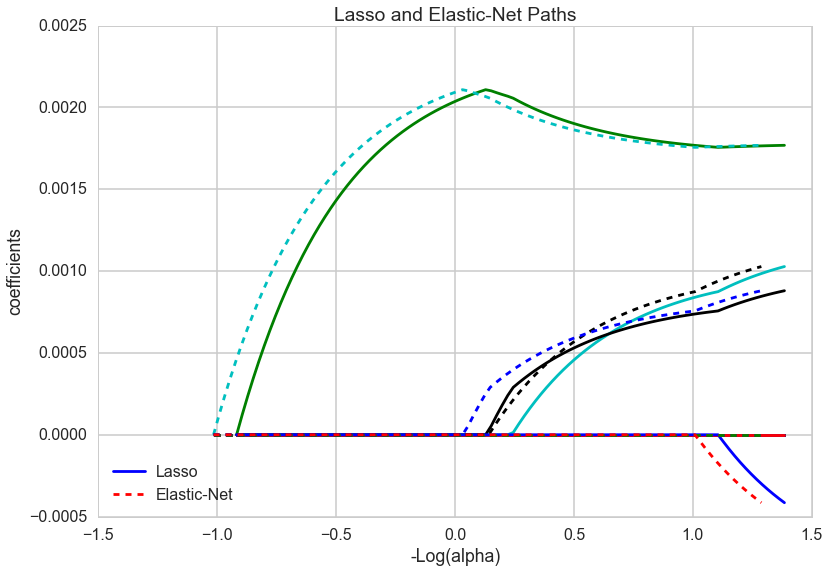

In [269]:
plt.figure(1)
ax = plt.gca()
ax.set_color_cycle(2 * ['b', 'r', 'g', 'c', 'k'])
l1 = plt.plot(-np.log10(alphas_lasso), coefs_lasso.T)
l2 = plt.plot(-np.log10(alphas_enet), coefs_enet.T, linestyle='--')

plt.xlabel('-Log(alpha)')
plt.ylabel('coefficients')
plt.title('Lasso and Elastic-Net Paths')
plt.legend((l1[-1], l2[-1]), ('Lasso', 'Elastic-Net'), loc='lower left')
# plt.axis('tight')


In [280]:
np.sum(np.abs(coefs_lasso.T), axis=1)

array([ 0.        ,  0.00012072,  0.00023516,  0.00034362,  0.00044644,
        0.0005439 ,  0.00063628,  0.00072385,  0.00080685,  0.00088553,
        0.0009601 ,  0.00103079,  0.0010978 ,  0.00116132,  0.00122152,
        0.00127859,  0.00133268,  0.00138396,  0.00143256,  0.00147863,
        0.0015223 ,  0.0015637 ,  0.00160293,  0.00164012,  0.00167538,
        0.0017088 ,  0.00174047,  0.0017705 ,  0.00179896,  0.00182593,
        0.0018515 ,  0.00187574,  0.00189872,  0.0019205 ,  0.00194114,
        0.00196071,  0.00197926,  0.00199684,  0.0020135 ,  0.0020293 ,
        0.00204427,  0.00205847,  0.00207192,  0.00208467,  0.00209676,
        0.00210822,  0.00215472,  0.00220879,  0.00226005,  0.00230865,
        0.00235977,  0.00242188,  0.00248073,  0.00253651,  0.00258939,
        0.00263957,  0.00268708,  0.00273211,  0.00277479,  0.00281525,
        0.00285361,  0.00288996,  0.00292442,  0.00295713,  0.00298809,
        0.00301744,  0.00304525,  0.00307162,  0.00309661,  0.00

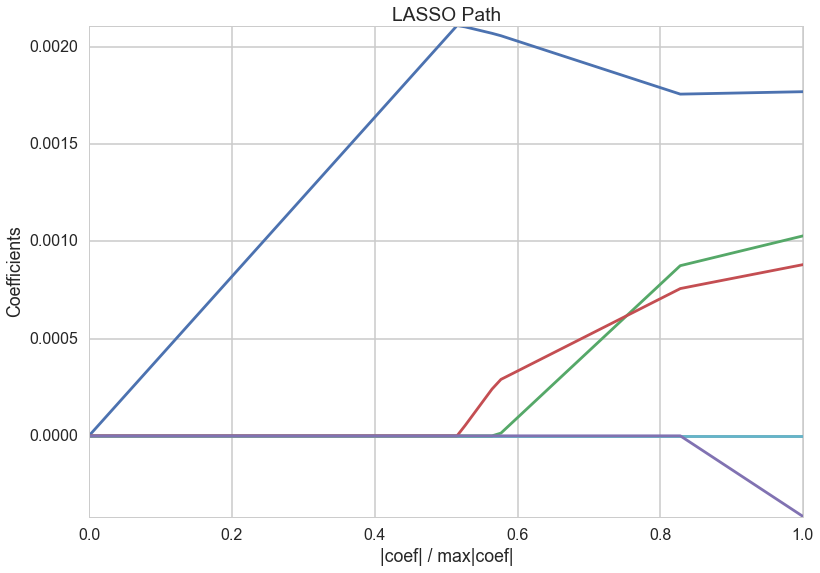

In [278]:
xx = np.sum(np.abs(coefs_lasso.T), axis=1)
xx /= xx[-1]

plt.plot(xx, coefs_lasso.T)
ymin, ymax = plt.ylim()
# plt.vlines(xx, ymin, ymax, linestyle='dashed')
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Coefficients')
plt.title('LASSO Path')
plt.axis('tight')
plt.show()


In [250]:
print X.shape, y.shape
print y

(442, 10) (442,)
[ 151.   75.  141.  206.  135.   97.  138.   63.  110.  310.  101.   69.
  179.  185.  118.  171.  166.  144.   97.  168.   68.   49.   68.  245.
  184.  202.  137.   85.  131.  283.  129.   59.  341.   87.   65.  102.
  265.  276.  252.   90.  100.   55.   61.   92.  259.   53.  190.  142.
   75.  142.  155.  225.   59.  104.  182.  128.   52.   37.  170.  170.
   61.  144.   52.  128.   71.  163.  150.   97.  160.  178.   48.  270.
  202.  111.   85.   42.  170.  200.  252.  113.  143.   51.   52.  210.
   65.  141.   55.  134.   42.  111.   98.  164.   48.   96.   90.  162.
  150.  279.   92.   83.  128.  102.  302.  198.   95.   53.  134.  144.
  232.   81.  104.   59.  246.  297.  258.  229.  275.  281.  179.  200.
  200.  173.  180.   84.  121.  161.   99.  109.  115.  268.  274.  158.
  107.   83.  103.  272.   85.  280.  336.  281.  118.  317.  235.   60.
  174.  259.  178.  128.   96.  126.  288.   88.  292.   71.  197.  186.
   25.   84.   96.  195.   53.  21